# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
# %load_ext nb_black  # for jupyter notebooks
!pip install black[jupyter] --quiet # for v=google colab

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [ ]:
# Library to help with statistical analysis
import scipy.stats as stats

# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.4'

## Loading the dataset

In [ ]:
# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data from file
data = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Course Work/Project 4/INNHotelsGroup.csv')

# copying data to another varaible to avoid any changes to original data
hotel = data.copy()

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
hotel.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


**Observation:** The dataset contains information about INN Hotel bookings made by the customers and the features/attributes of each booking.

* There are 4 different types of meal plans:
  * Meal Plan 1, Meal Plan 2, Meal Plan 3 & , Not Selected
* There are 7 different tpes of room:
  * Room_Type 1, Room_Type 2, Room_Type 3, Room_Type 4, Room_Type 5, Room_Type 6 & Room_Type 7
* There are 5 different types of marketing segments:
  * Offline, Online, Corporate, Aviation & Complementary

* The `Booking_ID` column contains unique values and can be dropped.

### Checking the shape of the dataset

In [ ]:
# View the shape of the dataset and count the number of rows and columns of the dataset
print(f'There are {hotel.shape[0]} rows and {hotel.shape[1]} columns')

There are 36275 rows and 19 columns


**Observation:** There are 36,275 rows and 19 columns.

### Checking the data types of the columns for the dataset

In [ ]:
# Checking the datatypes of the columns
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observation:** All of the above datatypes are as expected.

### Checking for duplicate values

In [ ]:
# Checking the for any duplicate records
hotel.duplicated().sum()

0

**Observation:** The dataset doesn't contain any duplicate values.

### Checking for missing values

In [ ]:
# checking for null values
hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observation:** There are missing values in many columns.

### Dropping Booking_ID column from the dataset

In [ ]:
# Checking for unique booking id values
hotel.Booking_ID.nunique()

36275

* The `BOOKING_ID` column contains only unique values, so we can drop it

In [ ]:
hotel = hotel.drop(["Booking_ID"], axis=1)

### Statistical summary of the dataset

In [ ]:
# Obtaining statistical summary of numerical and categorical data
hotel.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


**Observation:**

1. Below is the statistical summary for the categorical variables:

  1. **`type_of_meal_plan`** We have 4 unique meal plans in the dataset, with Mean Plan 1 the most popular and choosen by the customers.
  2. **`room_type_reserved`** We have 7 unique room types available out of which Room Type 1 is the most booked one by the customers.
  3. **`market_segment_type`** majority of the bookings have been online.
  4. **`booking_status`** Majority of the bookings have been Active and not cancelled.

2. Below is the statistical summary for the numberical variables:

  1. No. of children on a booking ranges from 0 to 10 and that could be one off a case.
  2. No. of week nights ranges from 0 to 17 and weekend nights ranges from 0 to 7.
  3. Booking lead time varies from 0 to 443 days, average/median being approximately 2 months out .
  4. No. of previous cancellations for customer ranges from 0 to 13.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

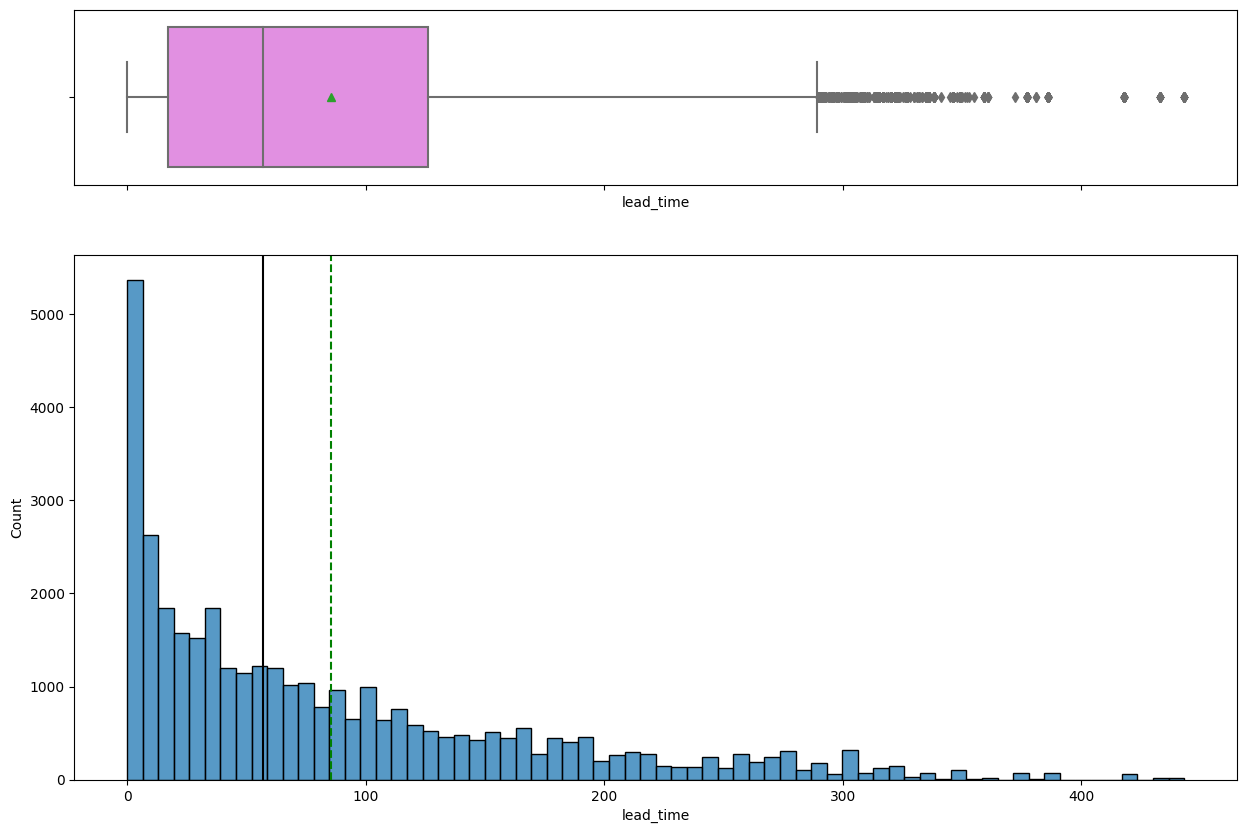

In [ ]:
histogram_boxplot(hotel, "lead_time")

**Observation:**
* The `lead_time` distribution is right skewed with median of 57 days.
* Some of the leisure and group bookings are done way in advance and business travels or hotel bookings are done more closer to the stay.

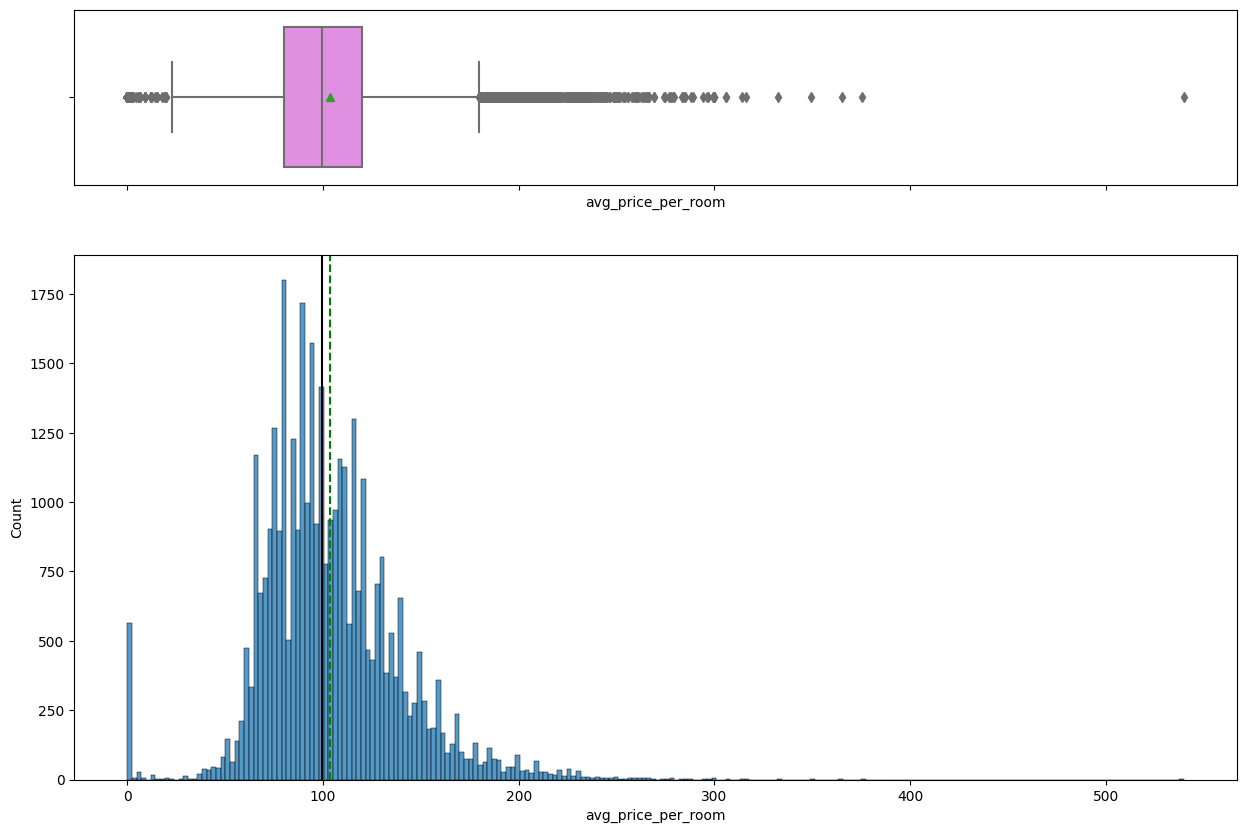

In [ ]:
histogram_boxplot(hotel, "avg_price_per_room")

**Observation:**
* The `avg_price_per_room` distribution looks right skewed with mean and median being very close around $100 with many outliers on the upper quartile.
* Some of the average room prices are higher either due to demand, time of booking, preferences, etc..
* We see some bookings here that may not have price and are showing up as zero during booking as there maybe some complementary bookings done.

In [ ]:
hotel.loc[hotel["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
# Lets assign outliers value of upper whisker

# Calculating the 25th quantile
Q1 = hotel["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = hotel["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR

print(f"Q1 = ",Q1)
print(f"Q3 = ",Q3)
print(f"IQR = ",IQR)
print(f"Upper_Whisker = ",Upper_Whisker)

Q1 =  80.3
Q3 =  120.0
IQR =  39.7
Upper_Whisker =  179.55


In [ ]:
# assigning the outliers the value of upper whisker
hotel.loc[hotel["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

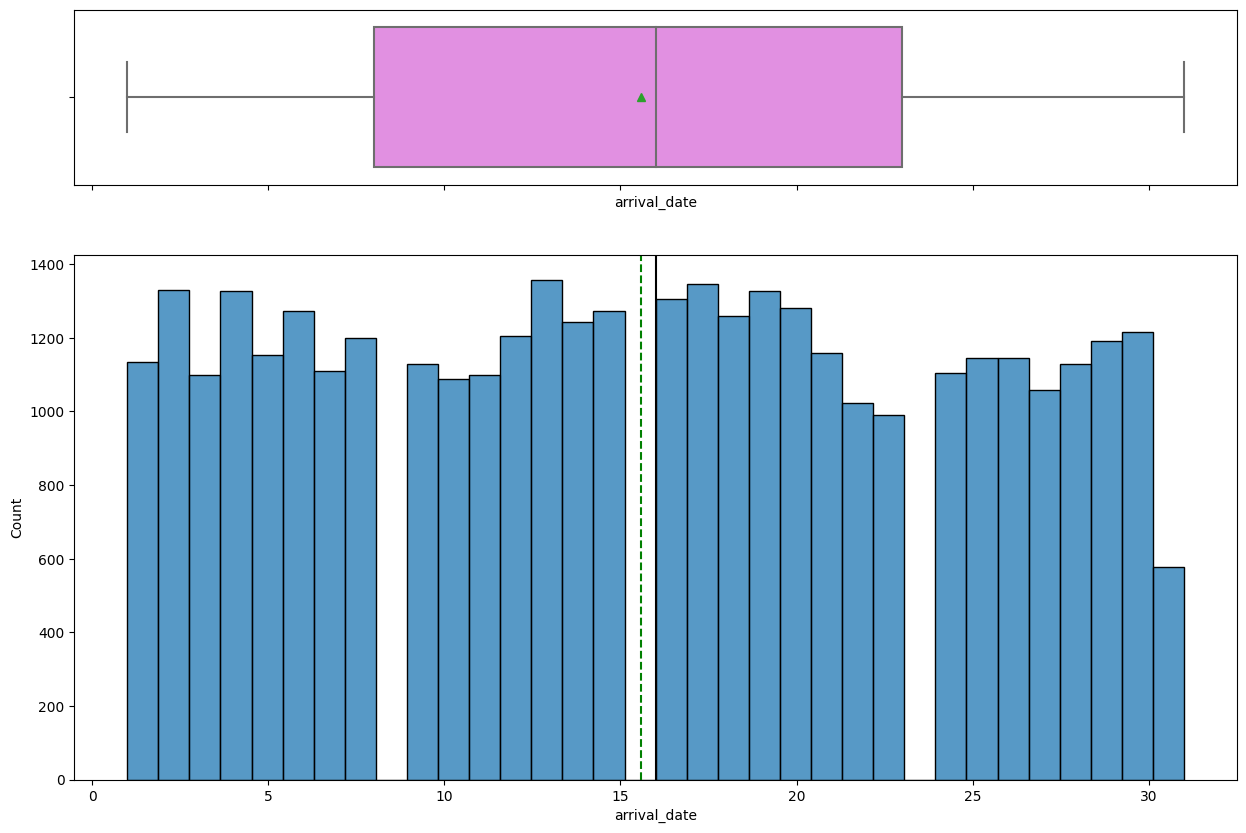

In [ ]:
histogram_boxplot(hotel, "arrival_date")

**Observation:** The`arrival_date` is uniformly distributed with few days of the month not being favourable.

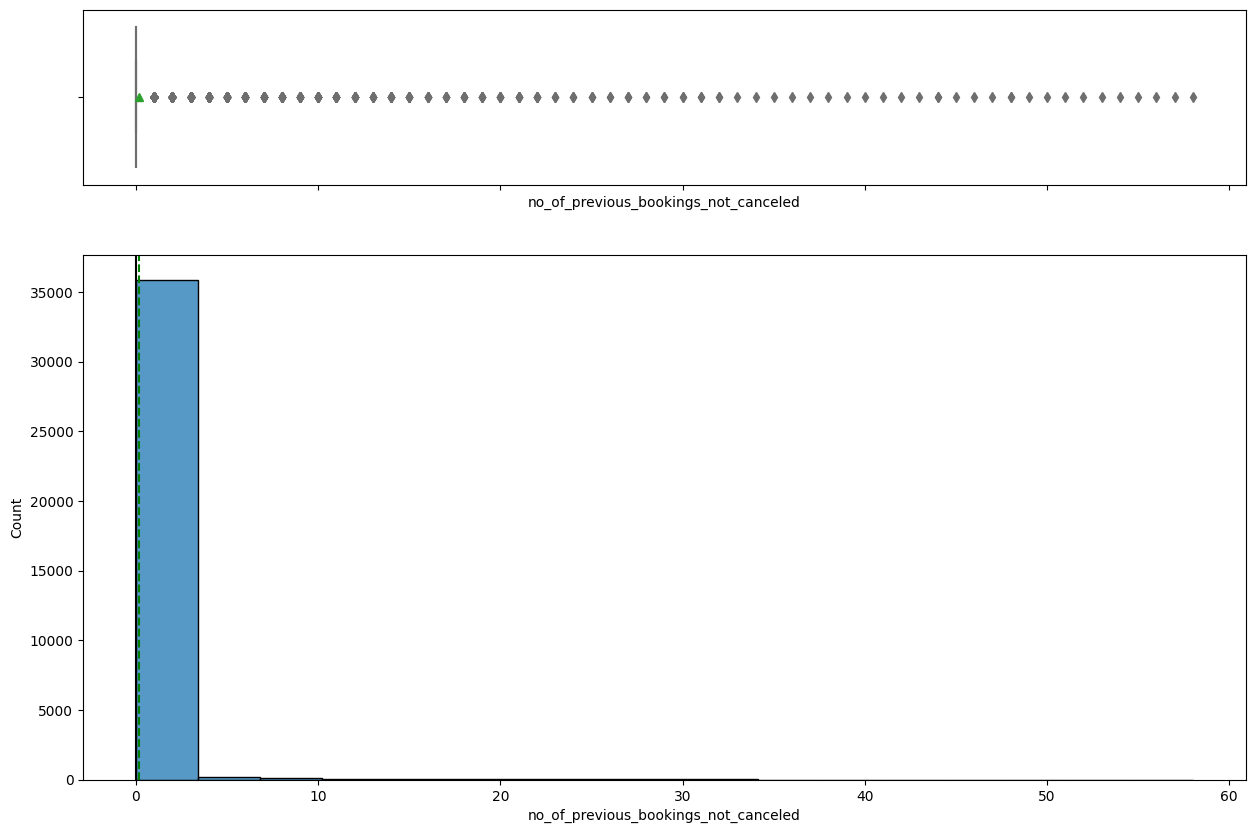

In [ ]:
histogram_boxplot(hotel, "no_of_previous_bookings_not_canceled")

**Observation:**
* The `no_of_previous_bookings_not_canceled` distribution is right skewed with median of zero, suggesting it may customers that have booked INN hotels are first time customers.
* Although we see there are some repeat customers with no previous cancellations.

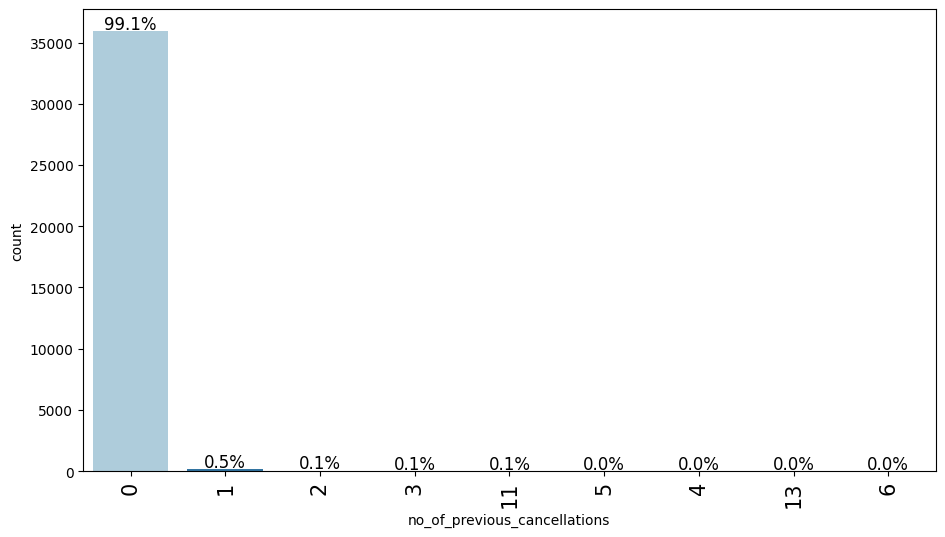

In [ ]:
labeled_barplot(hotel, "no_of_previous_cancellations", perc=True)

**Observation:** There are around 99% customers with no cancellations.

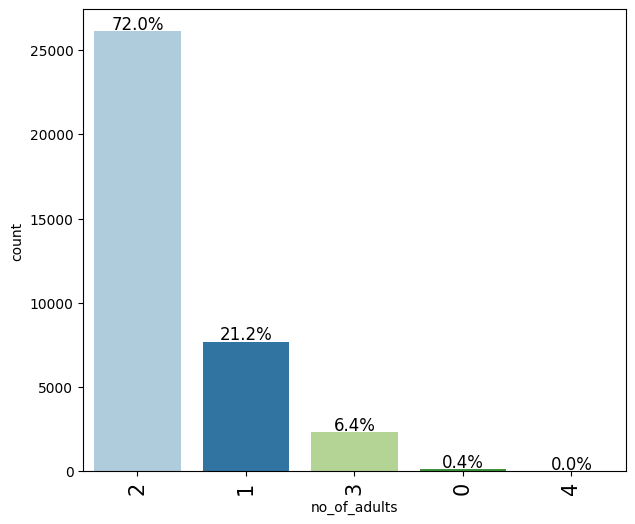

In [ ]:
labeled_barplot(hotel, "no_of_adults", perc=True)

**Observation:** Around 72% of the customers opt for 2 adults per room while booking.

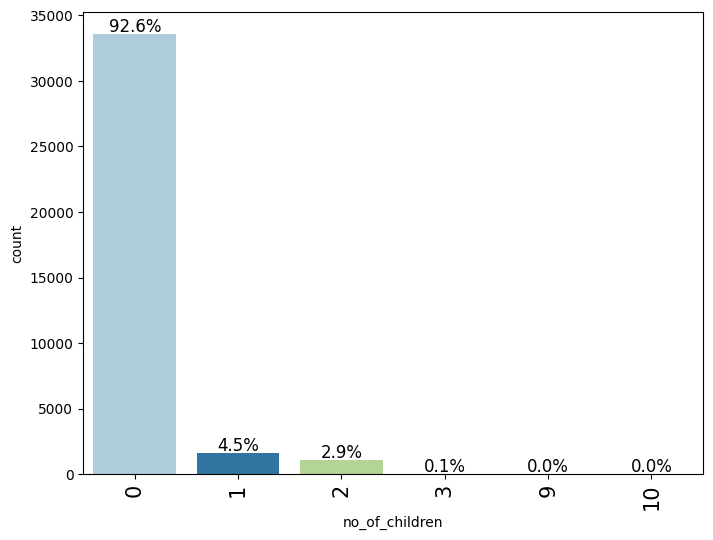

In [ ]:
labeled_barplot(hotel, "no_of_children", perc=True)

**Observation:**
* Around 93% of the customers haven't added kids to their booking.
* Also, looks like 9 and 10 kids on a given booking could be error and we will limit the upper range at 3.

In [ ]:
# replacing 9, and 10 children with 3
hotel["no_of_children"] = hotel["no_of_children"].replace([9, 10], 3)

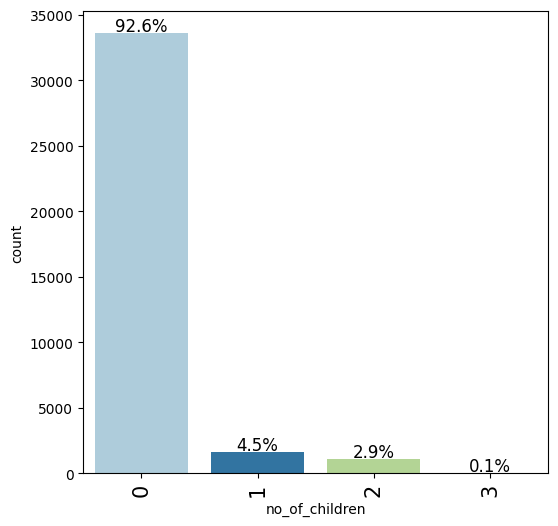

In [ ]:
labeled_barplot(hotel, "no_of_children", perc=True)

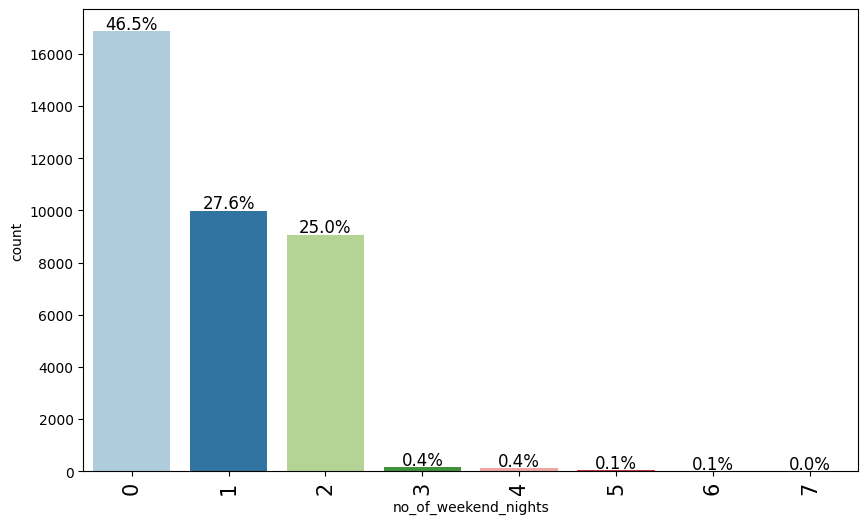

In [ ]:
labeled_barplot(hotel, "no_of_weekend_nights", perc=True)

**Observation:**
* Around 47% of the customers haven't booked their stay on a weekend night.
* Whereas, around 52% of the customers have booked their stay over weekend nights.

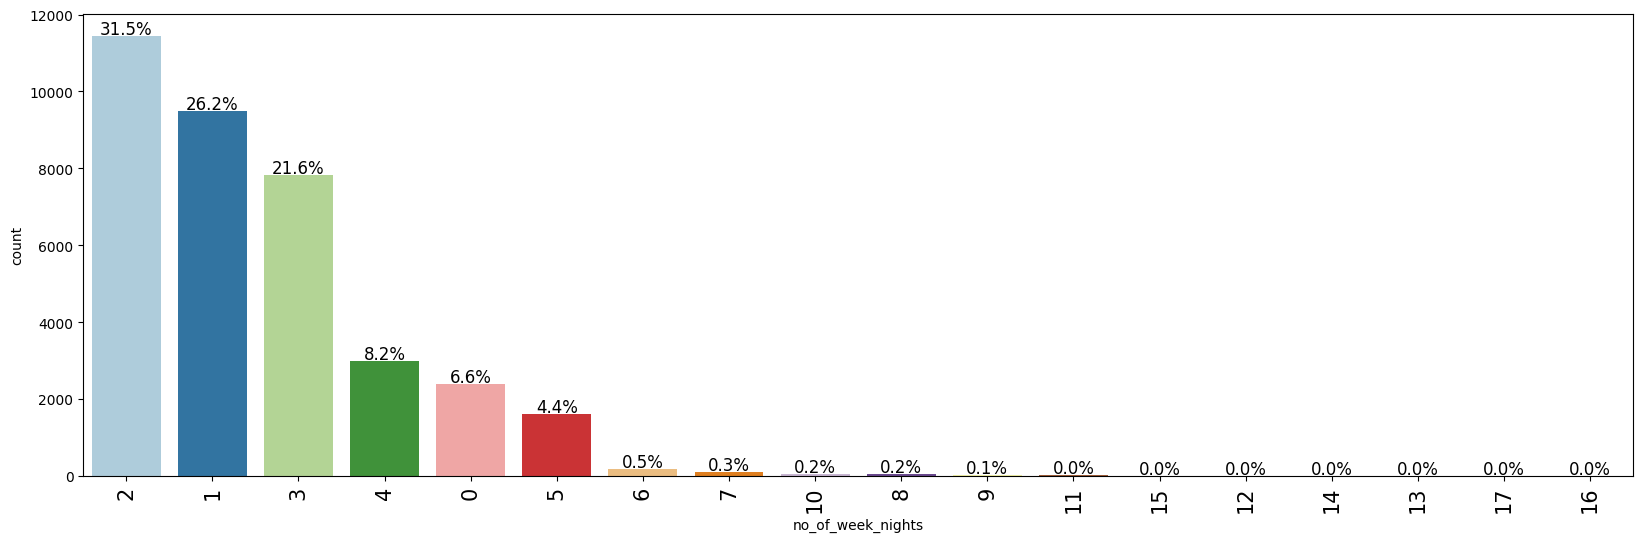

In [ ]:
labeled_barplot(hotel, "no_of_week_nights", perc=True)

**Observation:**
* Around 32% of the customers haven booked stay for not more than 2 weeknight.
* Whereas, around 80% of the customers have not booked their stay over 3 weeknights.

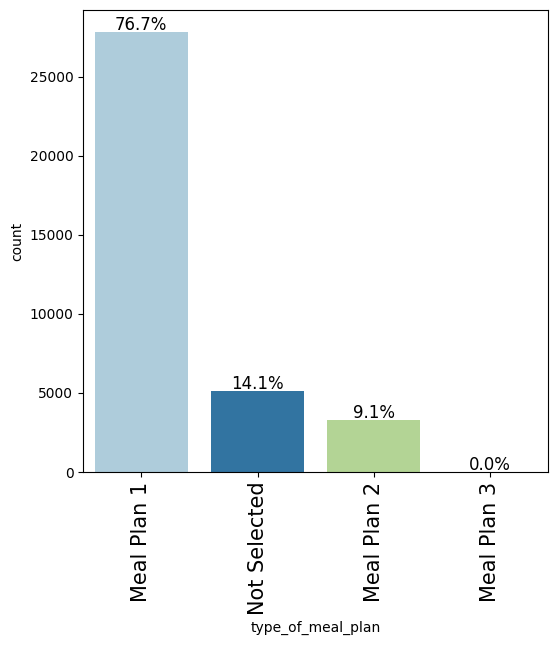

In [ ]:
labeled_barplot(hotel, "type_of_meal_plan", perc=True)

**Observation:** Around 77% of the customers choose Meal Plan 1 while booking the hotel.

* **Let's find out what are the busiest months in the hotel?**

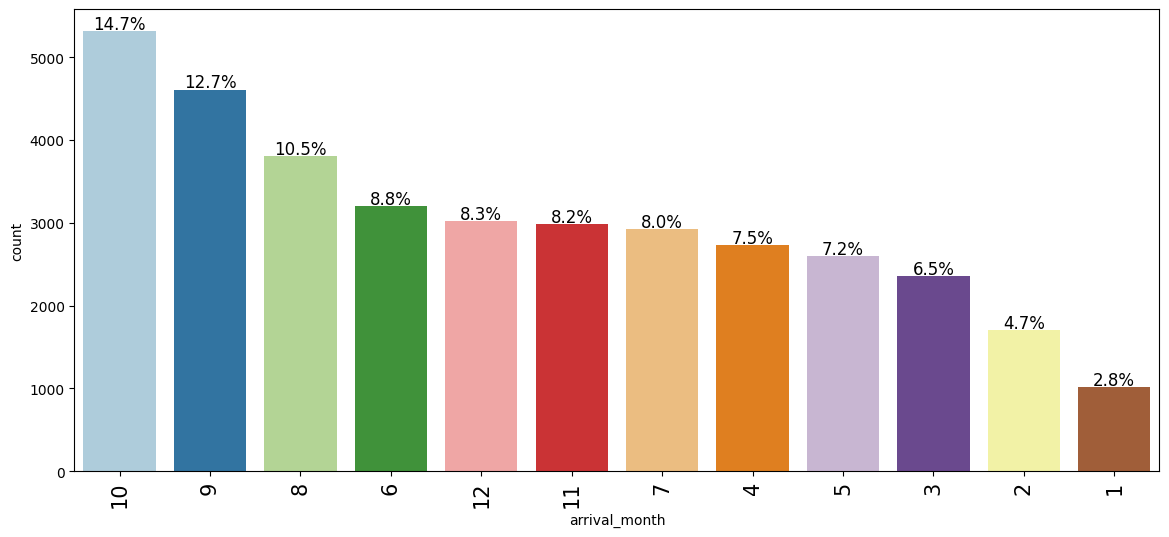

In [ ]:
labeled_barplot(hotel, "arrival_month", perc=True)

**Observation:** October is the most busiest month for the INN hotels. Around 15% of the INN hotel bookings are made in this month. In general August thru October combined result in around 38% of bookings.

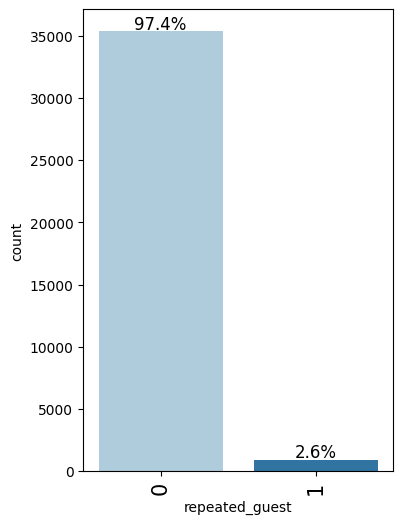

In [ ]:
labeled_barplot(hotel, "repeated_guest", perc=True)

**Observation:** Around only 3% of the customers are repeat customers.

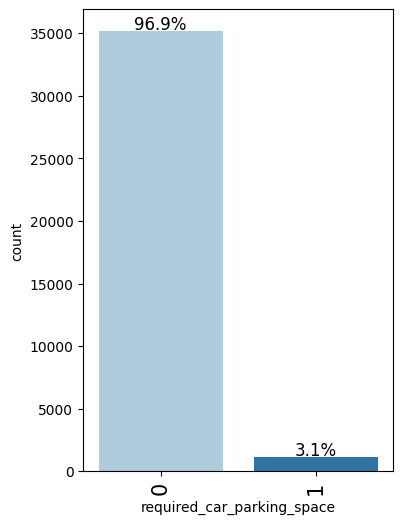

In [ ]:
labeled_barplot(hotel, "required_car_parking_space", perc=True)

**Observation:** Only 3% of the customers need car parking space, suggesting many hotels have accessibility to soome kind of public transport or hotel could be providing shuttle service.

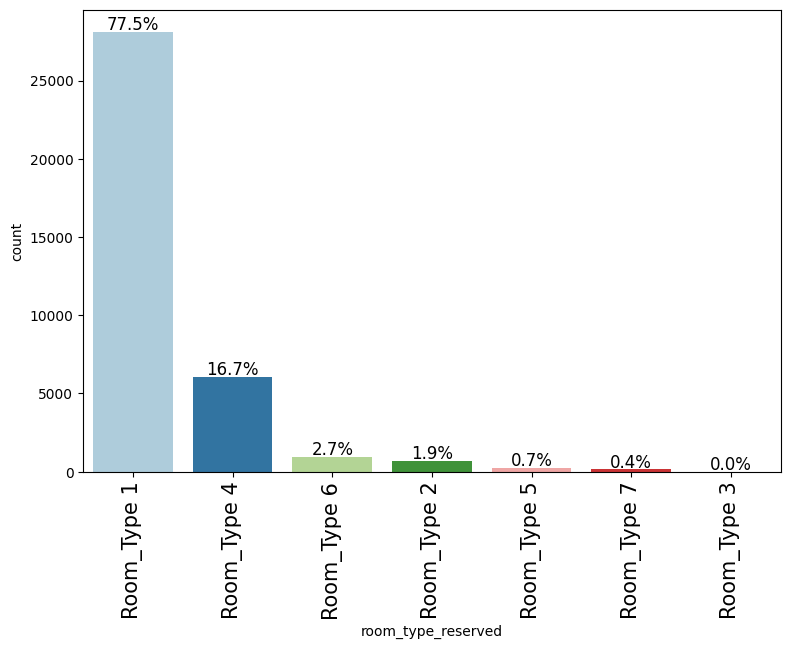

In [ ]:
labeled_barplot(hotel, "room_type_reserved", perc=True)

**Observation:** Around 77.5% of the customers choose Room Type 1 while booking the hotel.

* **Let's find out what market segment do most of the guests come from?**

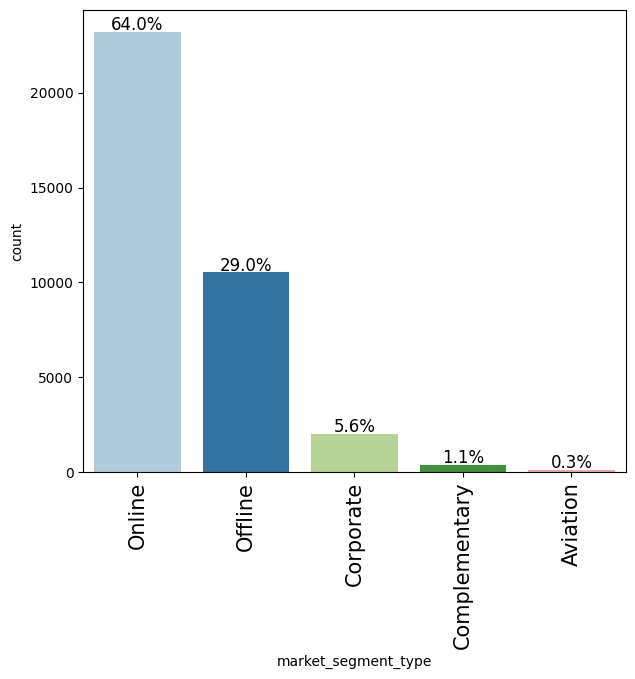

In [ ]:
labeled_barplot(hotel, "market_segment_type", perc=True)

**Observation:** Around 64% of the customers come from online market segment.

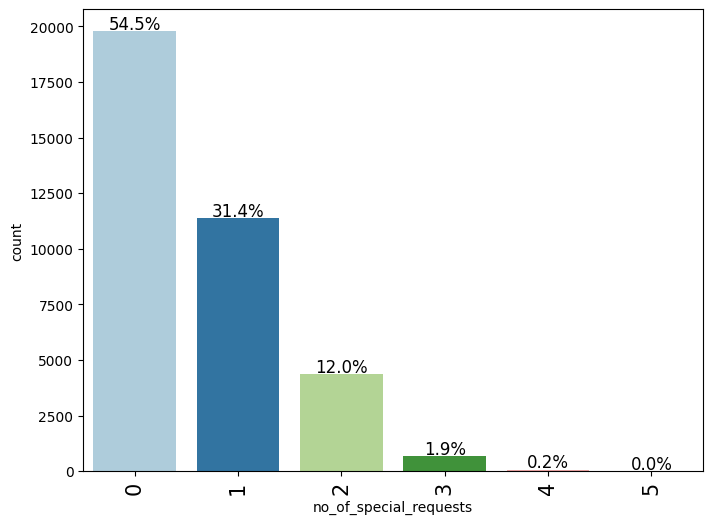

In [ ]:
labeled_barplot(hotel, "no_of_special_requests", perc=True)

**Observation:** Around 55% of the customers don't have any special requests while booking.

* **Let's find out what percentage of bookings are canceled?**

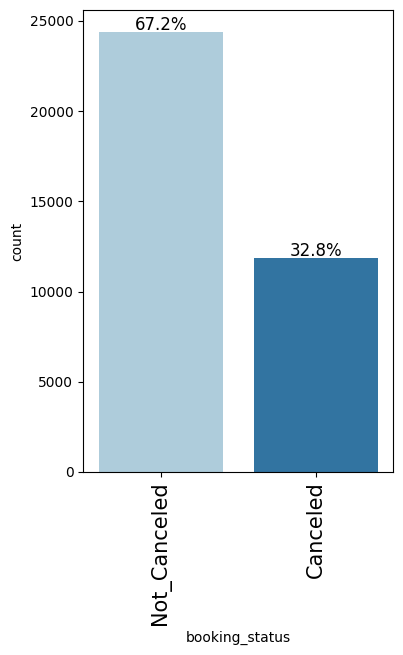

In [ ]:
labeled_barplot(hotel, "booking_status", perc=True)

**Observation:** Around 33% of the bookings are canceled.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [ ]:
hotel["booking_status"] = hotel["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

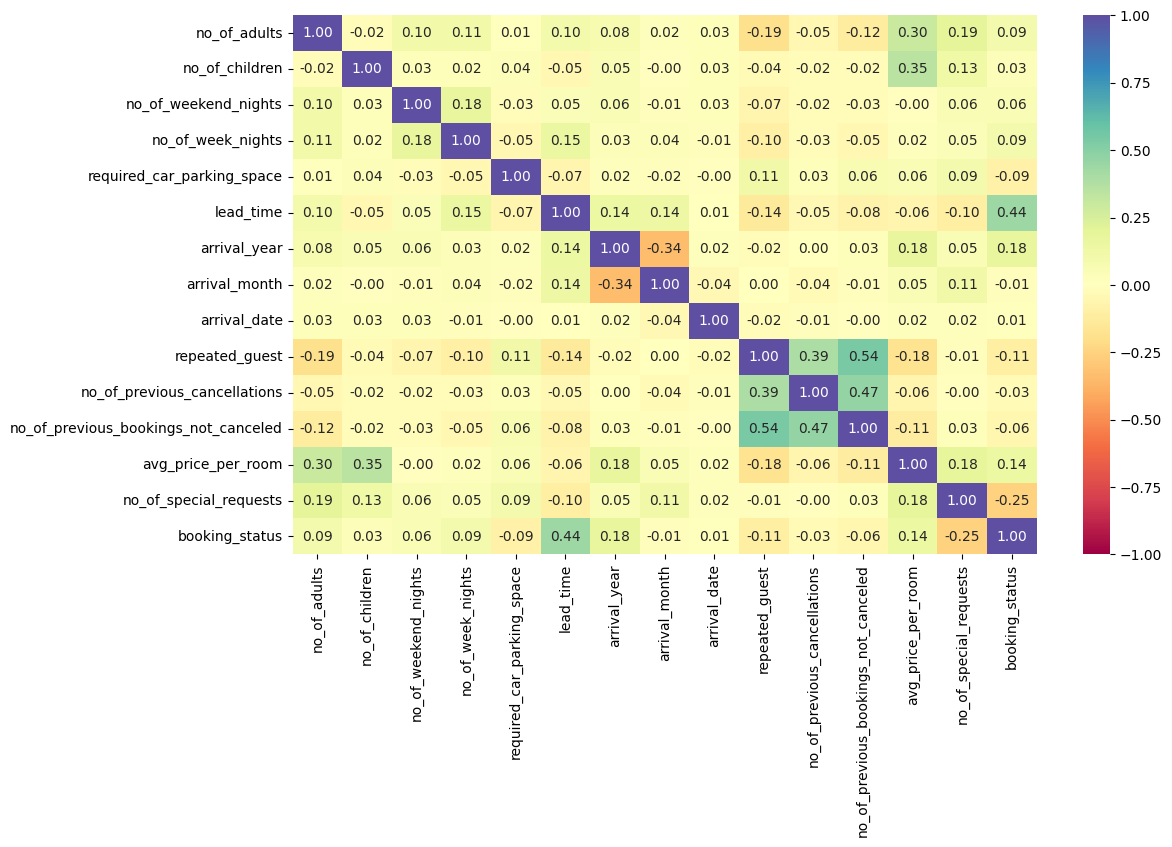

In [ ]:
cols_list = hotel.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**
* There's a positive correlation between the `repeated_guest` and `no_of_previous_bookings_not_canceled`.
* There's a positive correlation between the `no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled`.
* There's also a positive correlation between the `no_of_previous_cancellations` and `repeated_guest`.
* There's a positive correlation between the `booking_status` and `lead_time`.
* There's a positive correlation between the `avg_proce_per_room` and `no_of_adults` and `no_of_children`.
* No other variables are correlated. We will analyze it further.

* **Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segment?**

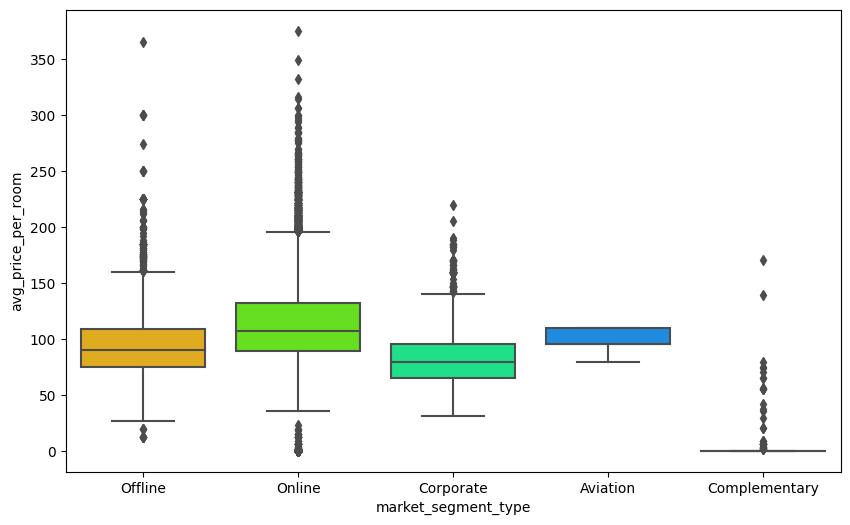

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=hotel, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observation:** Looks like Online market segment generates higher is the average prices per room.

* **Let's see if the special requests made by the customers impacts the prices of a room**

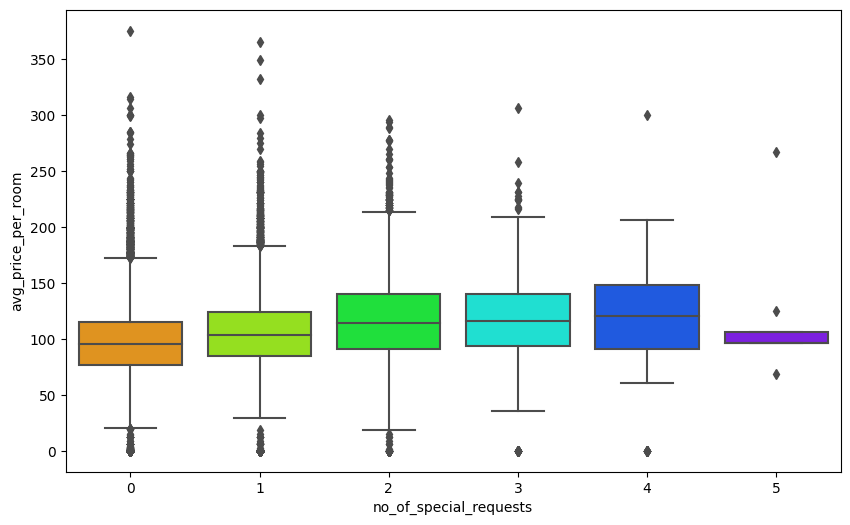

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=hotel, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observation:** Looks like higher the special number of requests higher is the average prices per room.

* **Let's see which market segments have most cancellations.**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


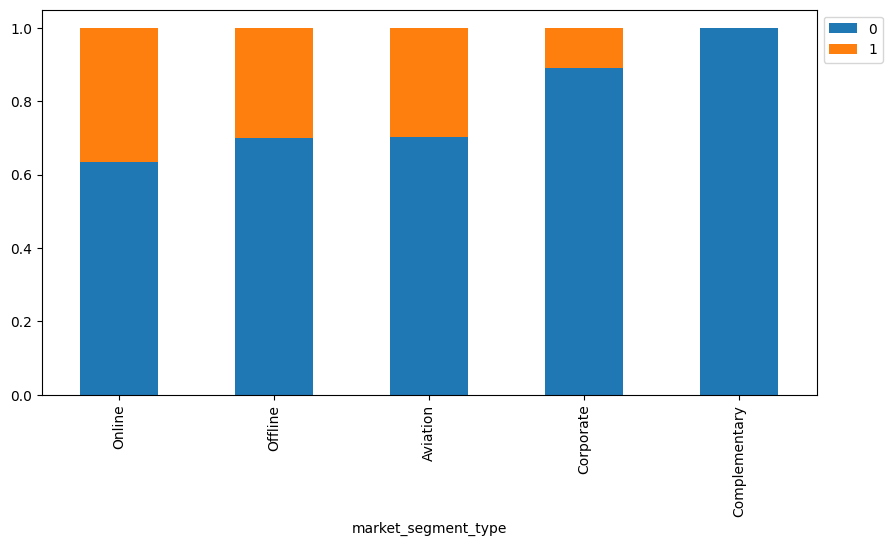

In [ ]:
stacked_barplot(hotel, "market_segment_type", "booking_status")

**Observation:** Looks like 36% of the online, 30% of Offline and 47% of Aviation reservations are canceled.

* **Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


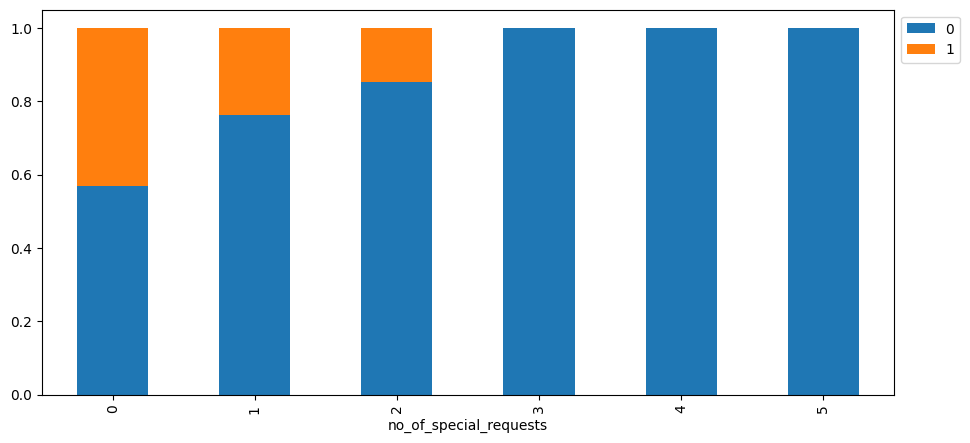

In [ ]:
stacked_barplot(hotel, "no_of_special_requests", "booking_status")

**Observation:** Looks like 43% of the customers bookings with no special request, 23% of the customers bookings with one special request and 14% of the customers bookings with two special request have cancellations.

* **Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


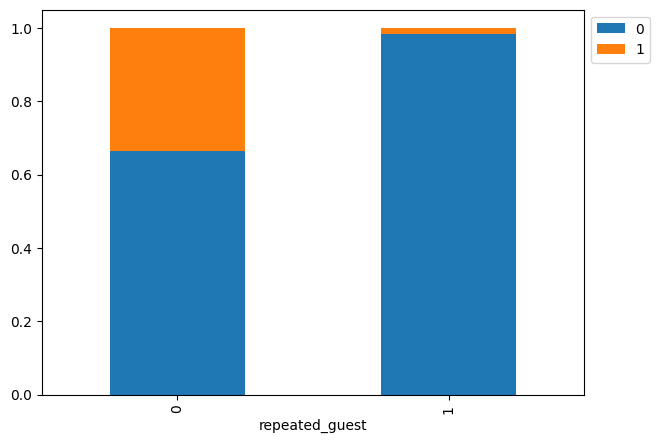

In [ ]:
stacked_barplot(hotel, "repeated_guest", "booking_status")

**Observation:** Looks like 34% of the first time customer bookings have cancellations.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [ ]:
family_data = hotel[(hotel["no_of_children"] >= 0) & (hotel["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [ ]:
family_data["no_of_family_members"] = (family_data["no_of_adults"] + family_data["no_of_children"])

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


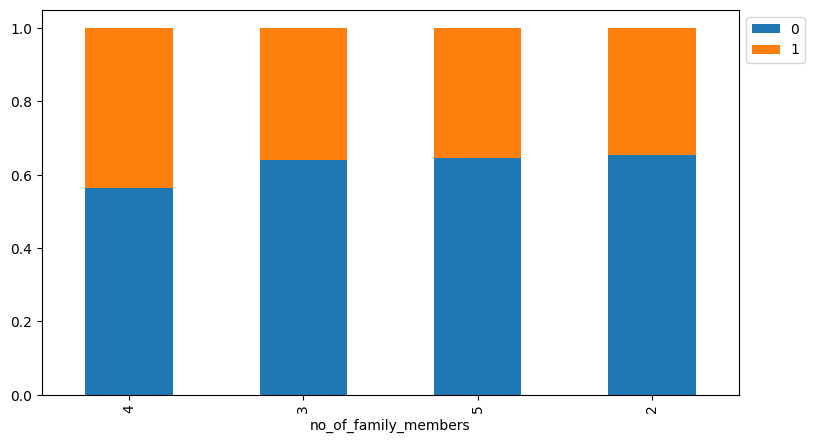

In [ ]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

**Observation:** Around 35% of the customers bookings with two guest, 36% of the customers bookings with three guest and 43% of the customers bookings with four guest have cancellations. Higher the number of guests more likely are cancellations, change in one's plan or health can impact entire reservation.

**Customers minimum stay can be 1 night and can go upto several nights. Let's do a similar analysis for the customer who stay for at least a night at the hotel and analyze the impact on booking status.**

In [ ]:
stay_data = hotel[(hotel["no_of_week_nights"] > 0) & (hotel["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [ ]:
stay_data["total_stay"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

booking_status      0     1    All
total_stay                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

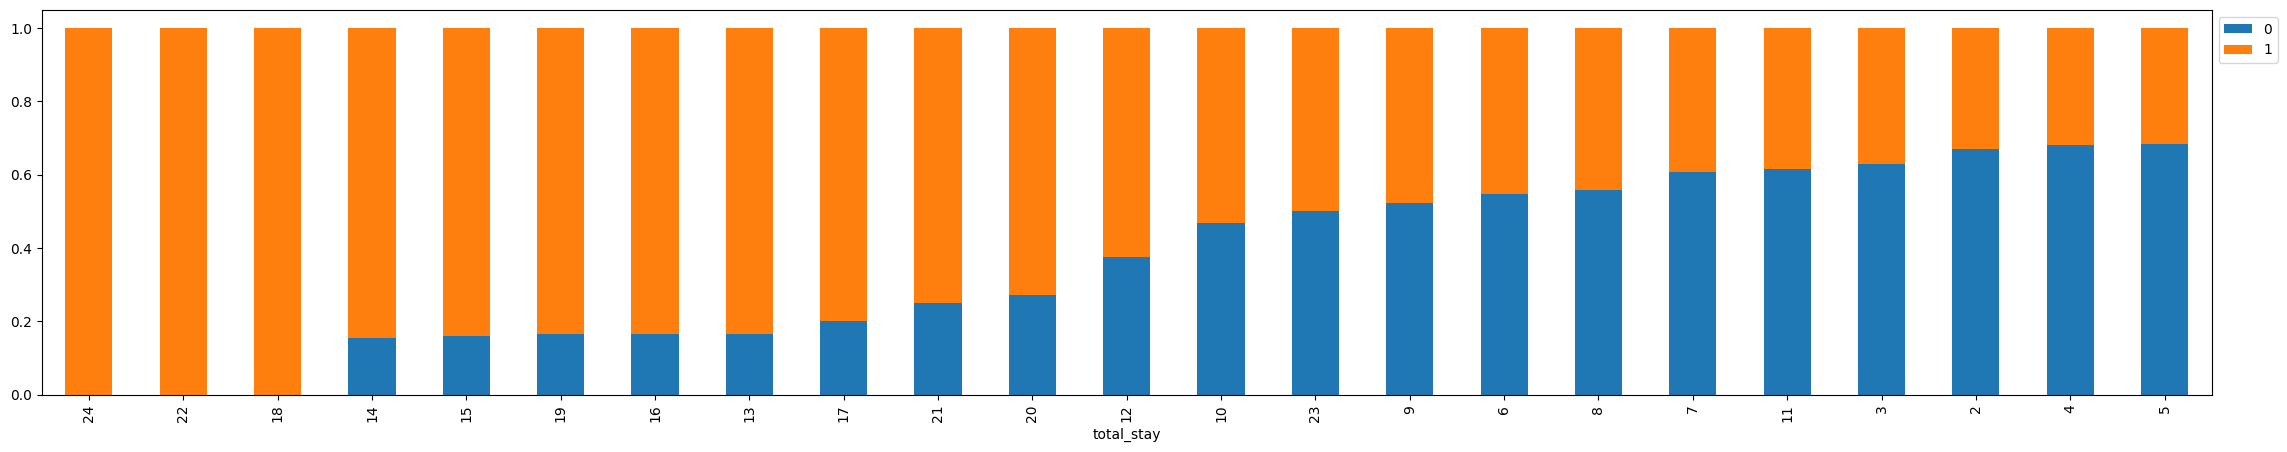

In [ ]:
stacked_barplot(stay_data, "total_stay", "booking_status")

**Observation:** Again, more the number of nights a customer has reserved on a booking more likely are cancellations, change in one's plan or health can impact entire reservation.

**We saw earlier that there is a positive correlation between booking status and lead time. Let's analyze it**

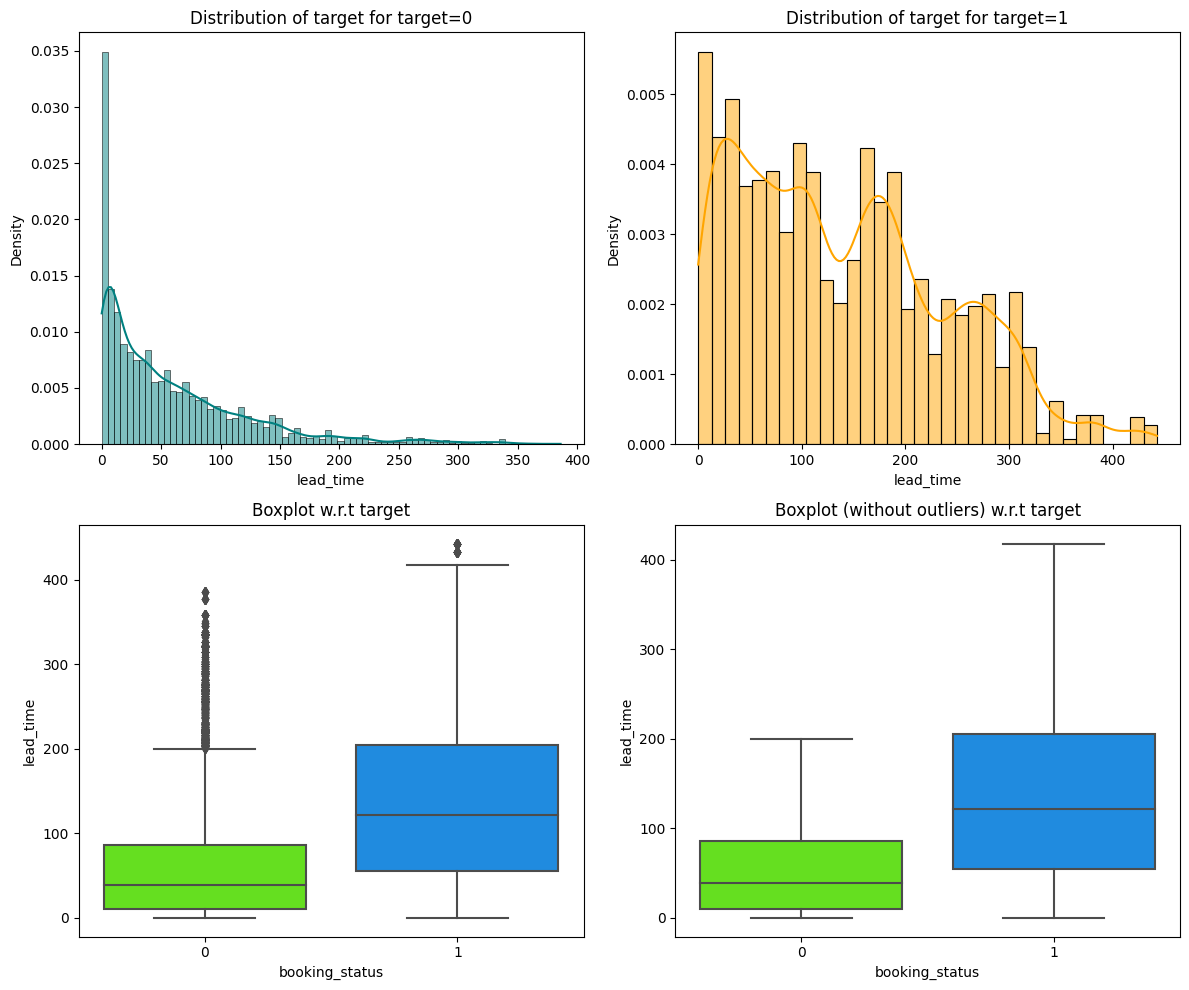

In [ ]:
distribution_plot_wrt_target(hotel, "lead_time", "booking_status")

**Observation:** Most of the cancellations occur with longer `lead_time`.

* **Lets analyze whether average price per room has any correlation to booking status.**

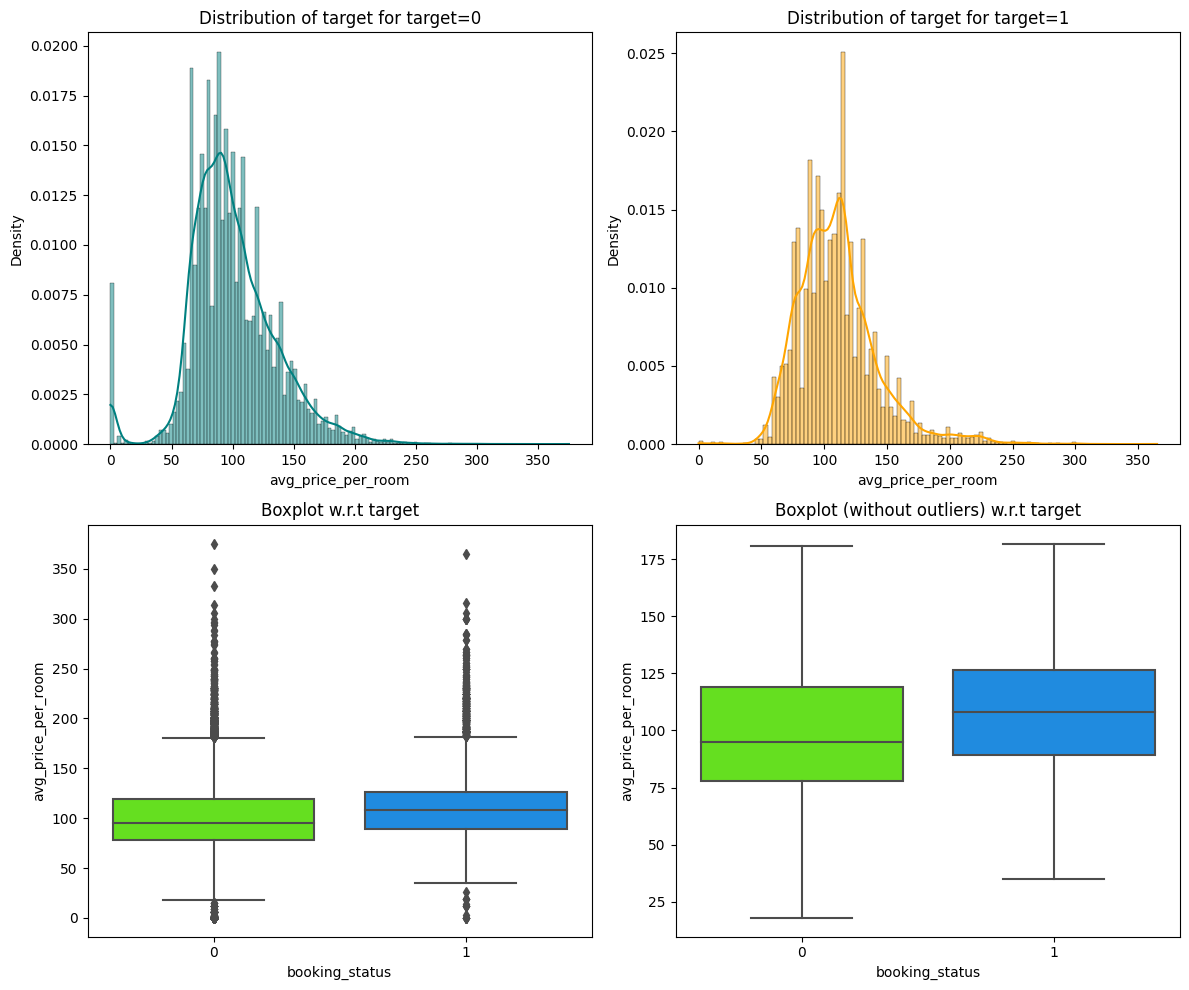

In [ ]:
distribution_plot_wrt_target(hotel, "avg_price_per_room", "booking_status")

**Observation:** There is a higher chance of cancellations when the `avg_price_per_room` is high.

# Logistic Regression

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

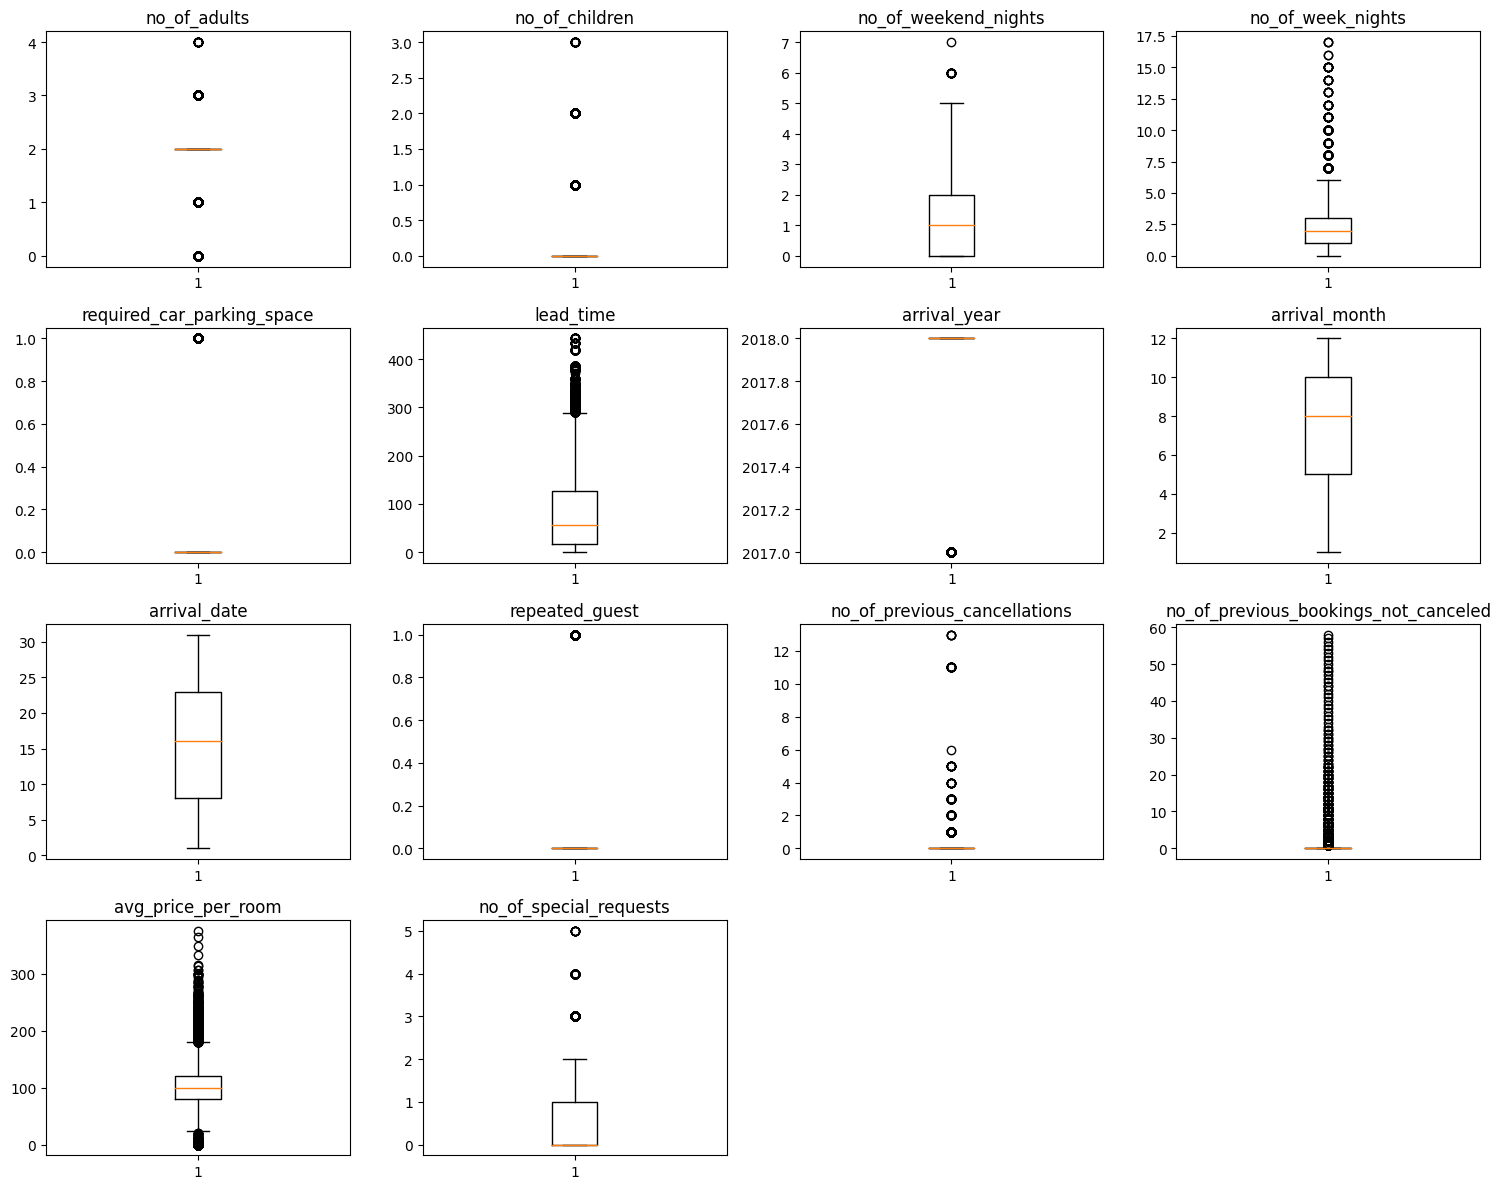

In [ ]:
# outlier detection using boxplot
numeric_columns = hotel.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(hotel[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

## Model Building

### Model evaluation criterion

### Model can make wrong predictions if:

1. We predict that a customer will not cancel their booking but they do (FN).
2. We predict that a customer will cancel their booking but they don't (FP).


### Which case is more important?
* Both the cases are important to us as:

* If we wrongly predict that a booking will not be canceled and the booking gets canceled then the hotel will lose revenue opportunity.

* If we wrongly predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide accomodation to the customer. This will lead to poor customer service and will damage the brand as the customer might not book with INN hotels again.


### How to reduce the losses?

* In our case INN hotels would want minimize both the False Positives and the False Negatives. Hence we need to maximize the `F1 Score`.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Data Preparation for Modeling

In [ ]:
X = hotel.drop(["booking_status"], axis=1)
Y = hotel["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Observation:** We had seen that around 67.6% of observations belongs to class 0 (Not Cancelled) and 32.3% observations belongs to class 1 (Cancelled), and this is preserved in the train and test sets

## Model Building - Logistic Regression

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.3292
Time:                        01:00:22   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

**Observations**

- Negative values of the coefficient show that the probability of a booking cancellation decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a booking cancellation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

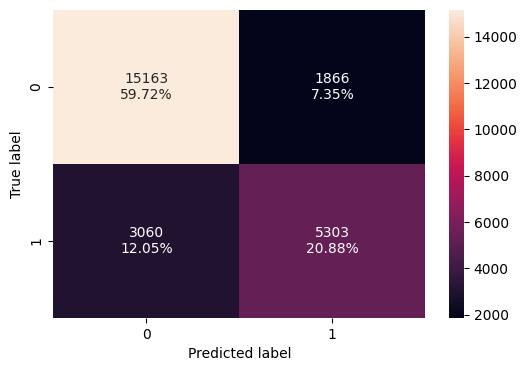

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


**Observation:**
* `market_segment` exhibits high multicollinearity.
* We will ignore the VIF for the dummy variables

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.3282
Time:                        01:00:26   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

**Observation:** Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**Observation:** here is no significant change in the F1 score.

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


**Coefficient interpretations:**

* `required_car_parking_space`: Holding all other features constant a 1 unit change in `required_car_parking_space` will decrease the odds of a cancellation by ~0.20 times or a ~80% decrease in odds of cancellation.
* `repeated_guest`: Holding all other features constant a 1 unit change in the `repeated_guest` will decrease the odds of cancellation by ~0.06 times or a decrease of ~93% decrease in cancellations.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the `no_of_special_requests` will decrease the odds of cancellation by ~0.22 times or a decrease of ~77% decrease in cancellations.
* `market_segment_type`: Holding all other features constant a 1 unit change in the `market_segment_type` being offline, it will decrease the odds of cancellation by ~0.16 times or a decrease of ~83% decrease in cancellations.

#### **Checking model performance on the training & testing set**

**Training set performance**

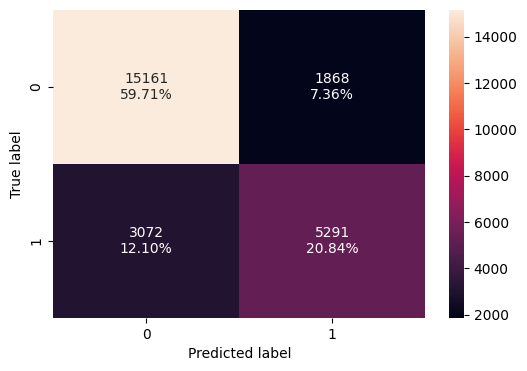

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**Test set performance**

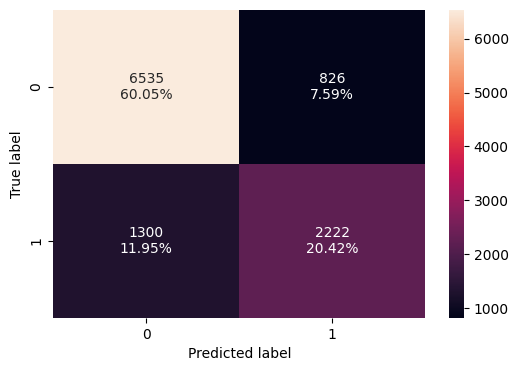

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
print("Test performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


**Observation:**
* The model is giving a good f1_score of ~0.681 and ~0.676 on the train and test sets respectively
* As the train and test performances are comparable, the model is not overfitting
* Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

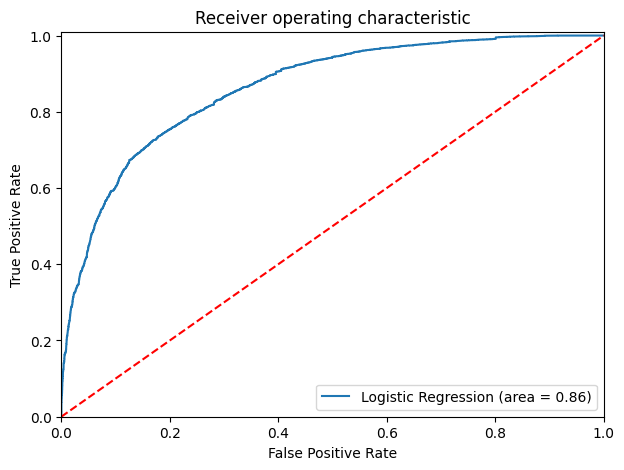

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* **Observation:** Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


**Checking model performance on training set**

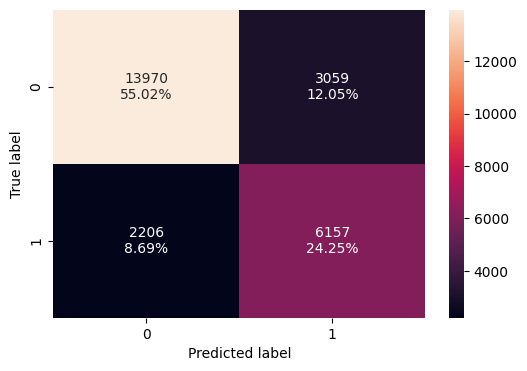

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


* **Observation:** Recall and F1 score of the model has increased.

**Checking model performance on test set**

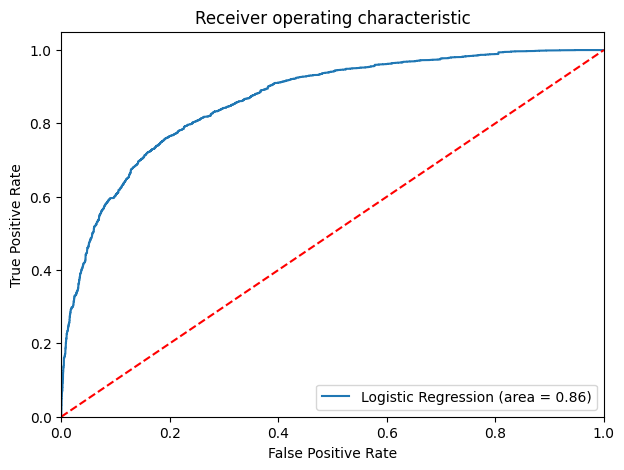

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

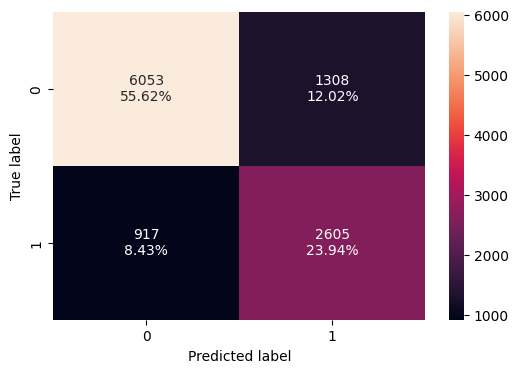

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


* **Observation:** The model is giving a good f1_score of ~0.7004 and ~0.7007 on the train and test sets respectively.

### Precision-Recall Curve
* Let's use Precision-Recall curve and see if we can find a better threshold

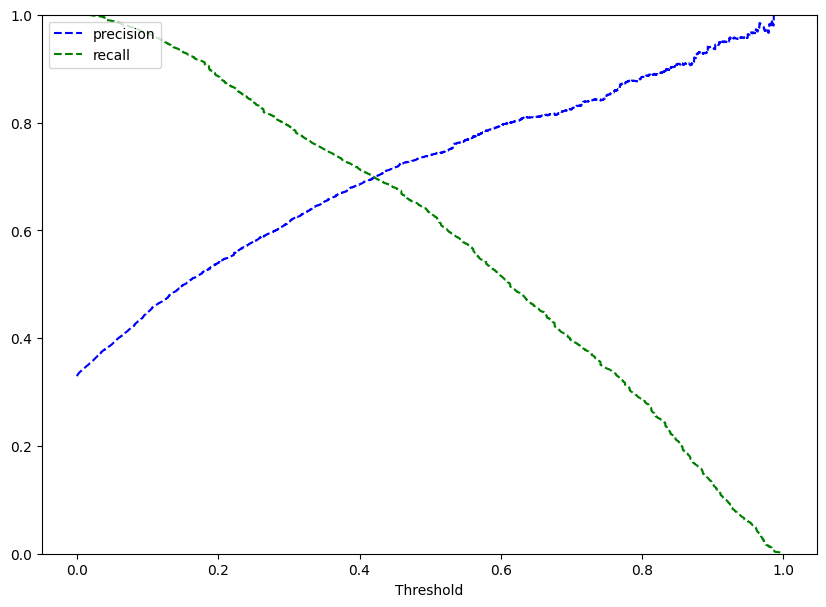

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* **Observation:** At the threshold of 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

In [ ]:
# Find threshold programmatically
optimal_idx_a = np.argmin(abs(prec - rec))
optimal_threshold_pr = tre[optimal_idx_a]
print(optimal_threshold_pr)

0.4208437617200989


**Checking model performance on training set**

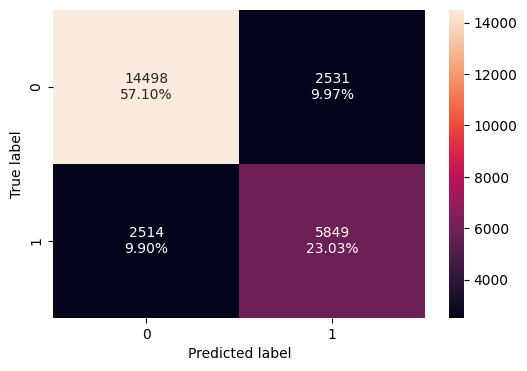

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


**Observation:**
* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.37 and here we get 0.42 as the optimal threshold.

**Checking model performance on test set**

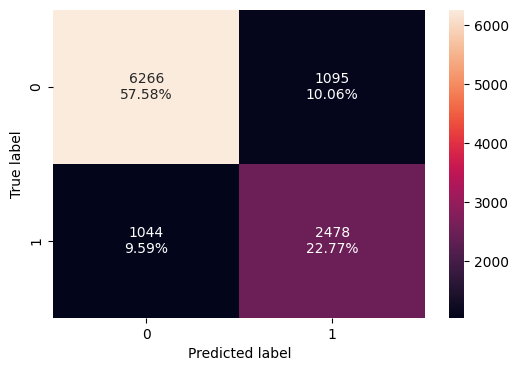

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


* **Observation:** The model is giving a good f1_score of ~0.698 on both the train and test sets.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


**Observation:**
* Almost all the three models are performing well on both training and test data without the problem of overfitting
* The model with a threshold value of 0.42 is more balanced with Recall and Precision nearly close to each other and with a comparibly similar F1 score as other models with various thresholds.


# Decision Tree

## Building a Decision Tree model
* We want to predict which bookings will be canceled.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Data Preparation for Modeling

In [ ]:
X = hotel.drop(["booking_status"], axis=1)
Y = hotel["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Observation:** We had seen that around 67.6% of observations belongs to class 0 (Not Cancelled) and 32.3% observations belongs to class 1 (Cancelled), and this is preserved in the train and test sets

## Model Building

### Decision Tree (default)

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

### Model evaluation criterion

### Model can make wrong predictions if:

1. We predict that a customer will not cancel their booking but they do (FN).
2. We predict that a customer will cancel their booking but they don't (FP).


### Which case is more important?
* Both the cases are important to us as:

* If we wrongly predict that a booking will not be canceled and the booking gets canceled then the hotel will lose revenue opportunity.

* If we wrongly predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide accomodation to the customer. This will lead to poor customer service and will damage the brand as the customer might not book with INN hotels again.


### How to reduce the losses?

* In our case INN hotels would want minimize both the False Positives and the False Negatives. Hence we need to maximize the `F1 Score`.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#### Building Decision Tree Model

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Training set performance**

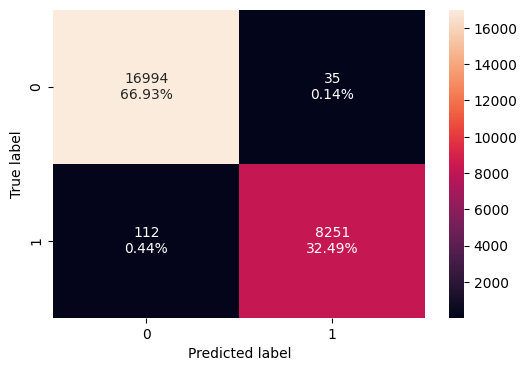

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


**Test set performance**

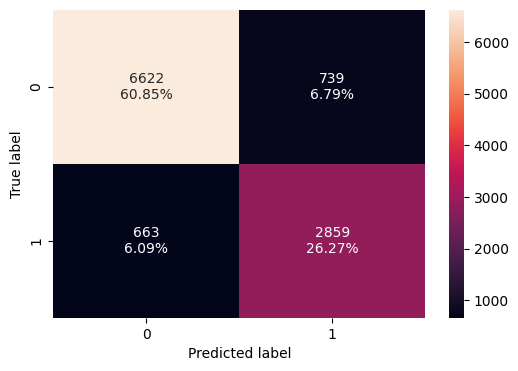

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


**Observation:** There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

**Before pruning the tree let's check the important features.**

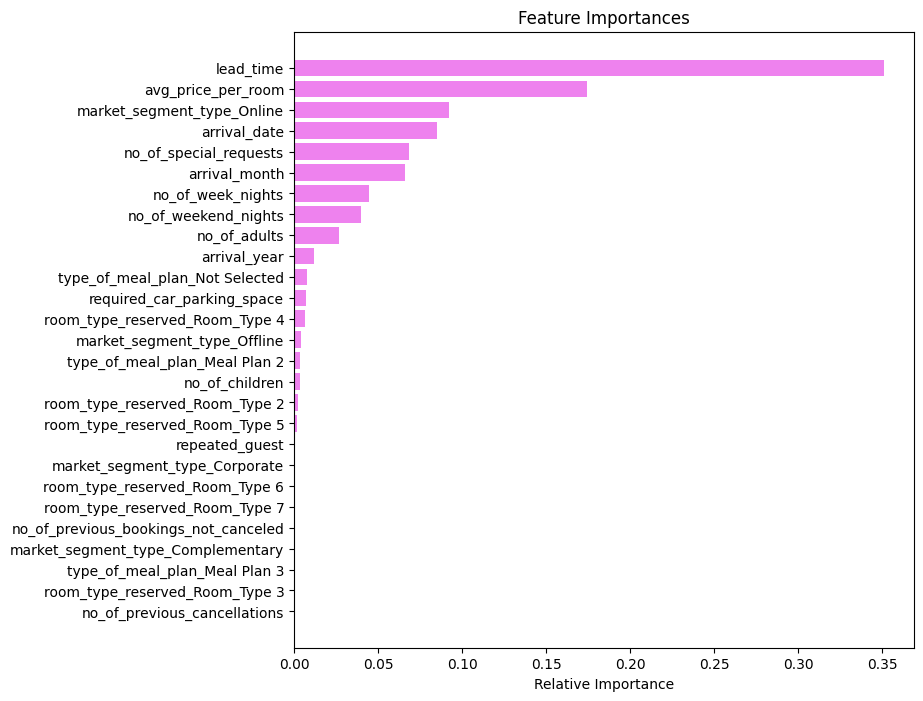

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Training set performance**

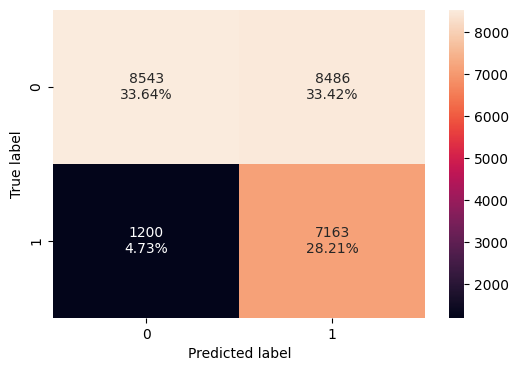

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.61854,0.85651,0.45773,0.59662


**Test set performance**

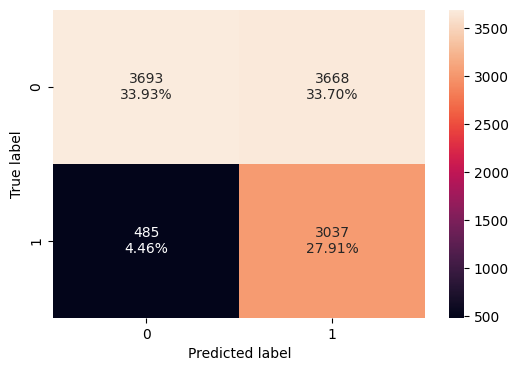

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.61840,0.86229,0.45295,0.59392


**Observation:** The model is giving a generalized result now since the F1 score is 0.59

### Visualizing the Decision Tree

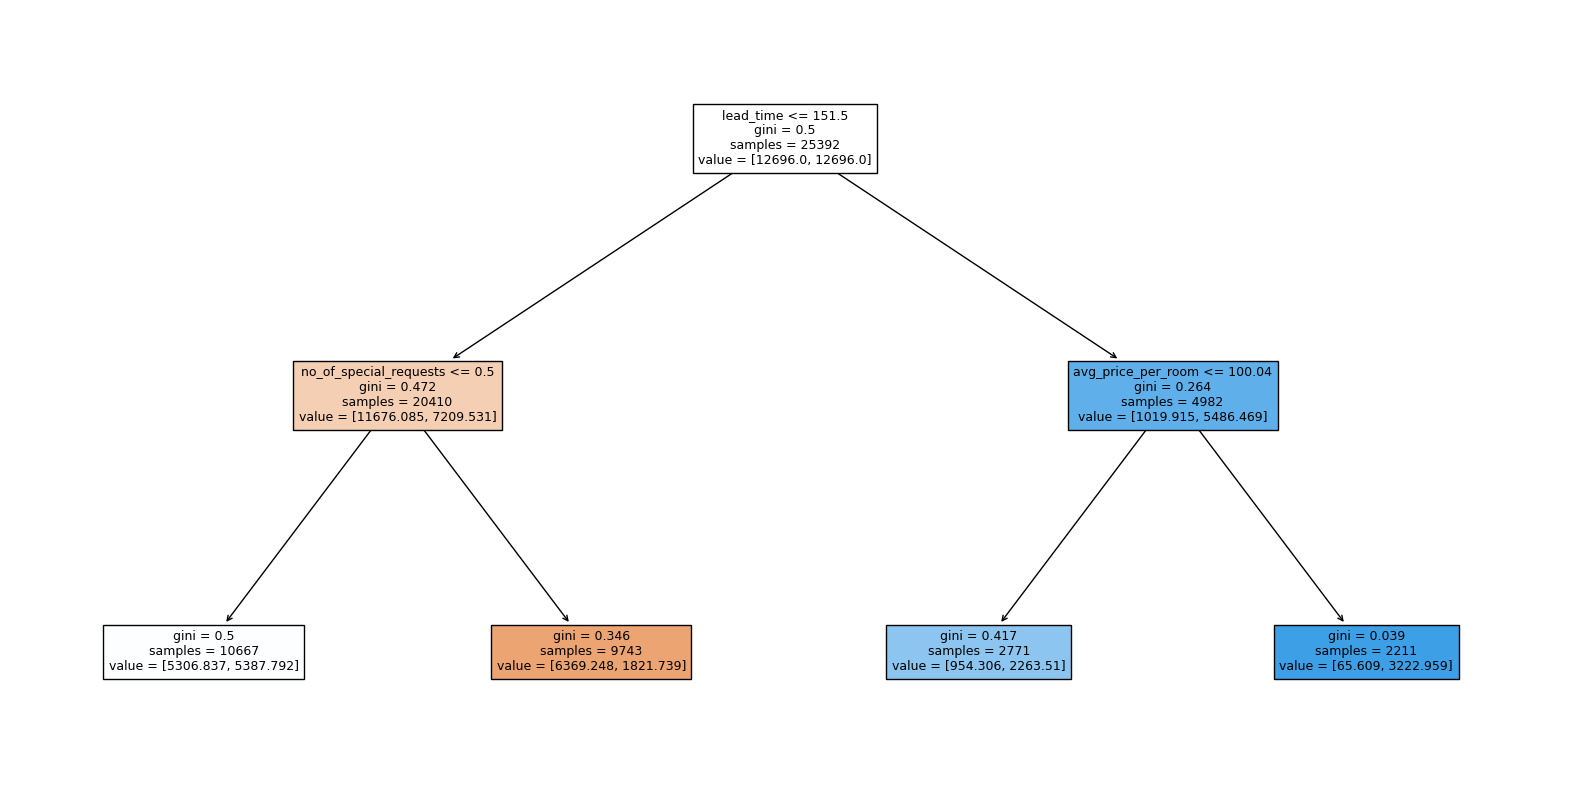

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.50 days, the number of special requests is less than or equal to 0.50 or if the lead time is greater than 151.50 days, then cancellations are most likey to occur.

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

**Observation:** From the important features also, `lead_time` and `avg_price_per_room` are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


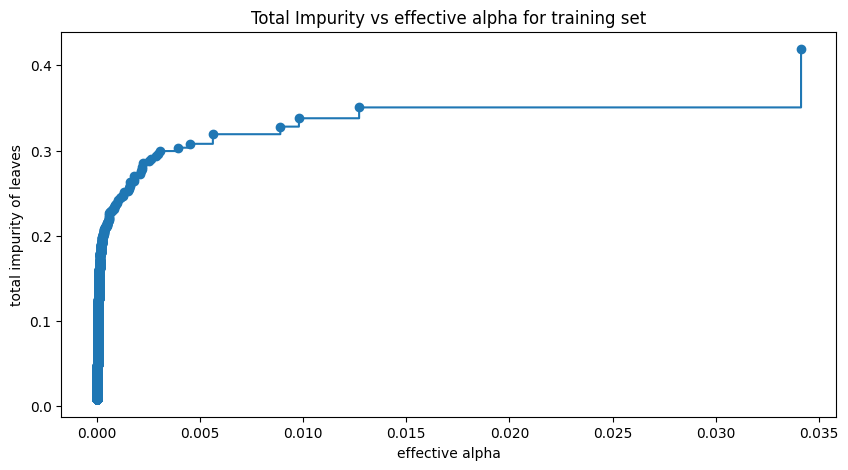

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

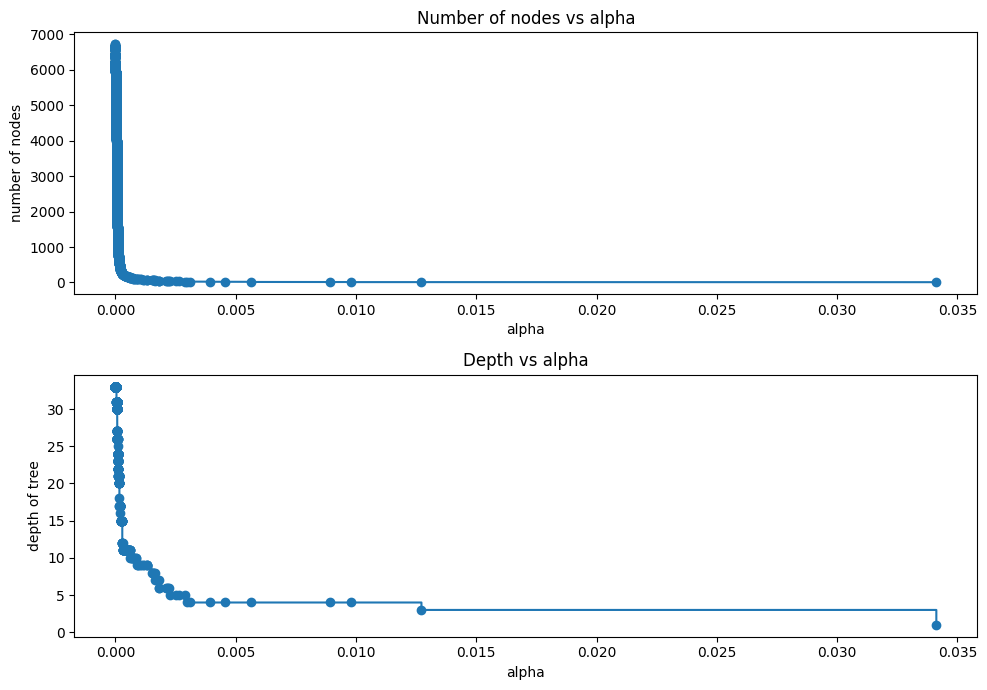

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

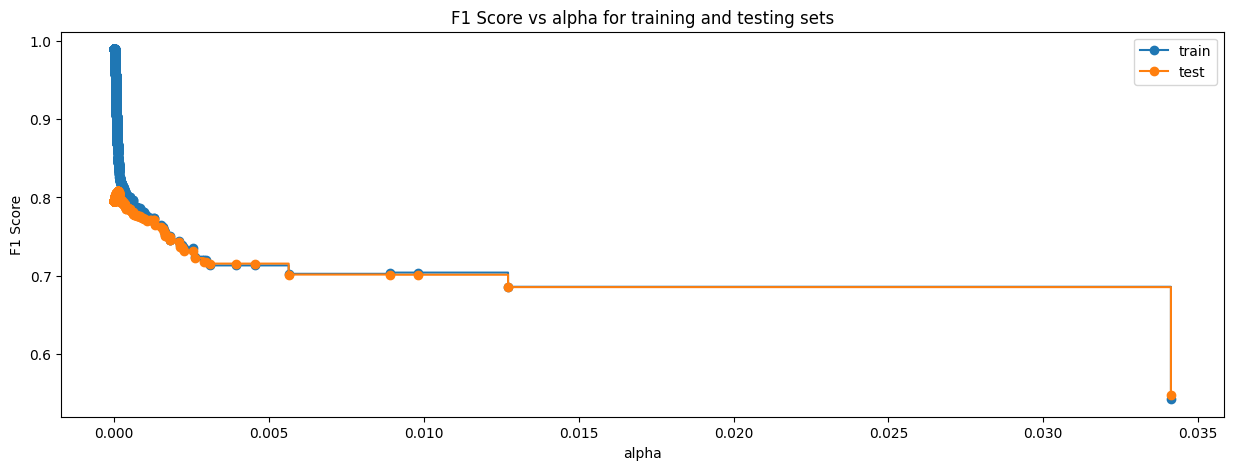

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


**Training set performance**

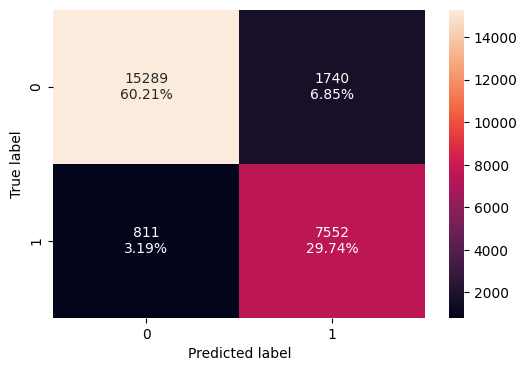

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


**Test set performance**

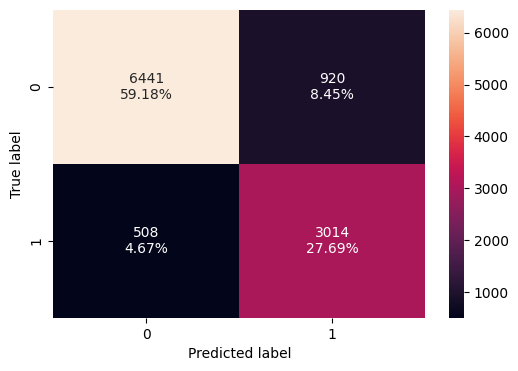

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


**Observation:** The model is giving a better result now with the F1 score around 0.80

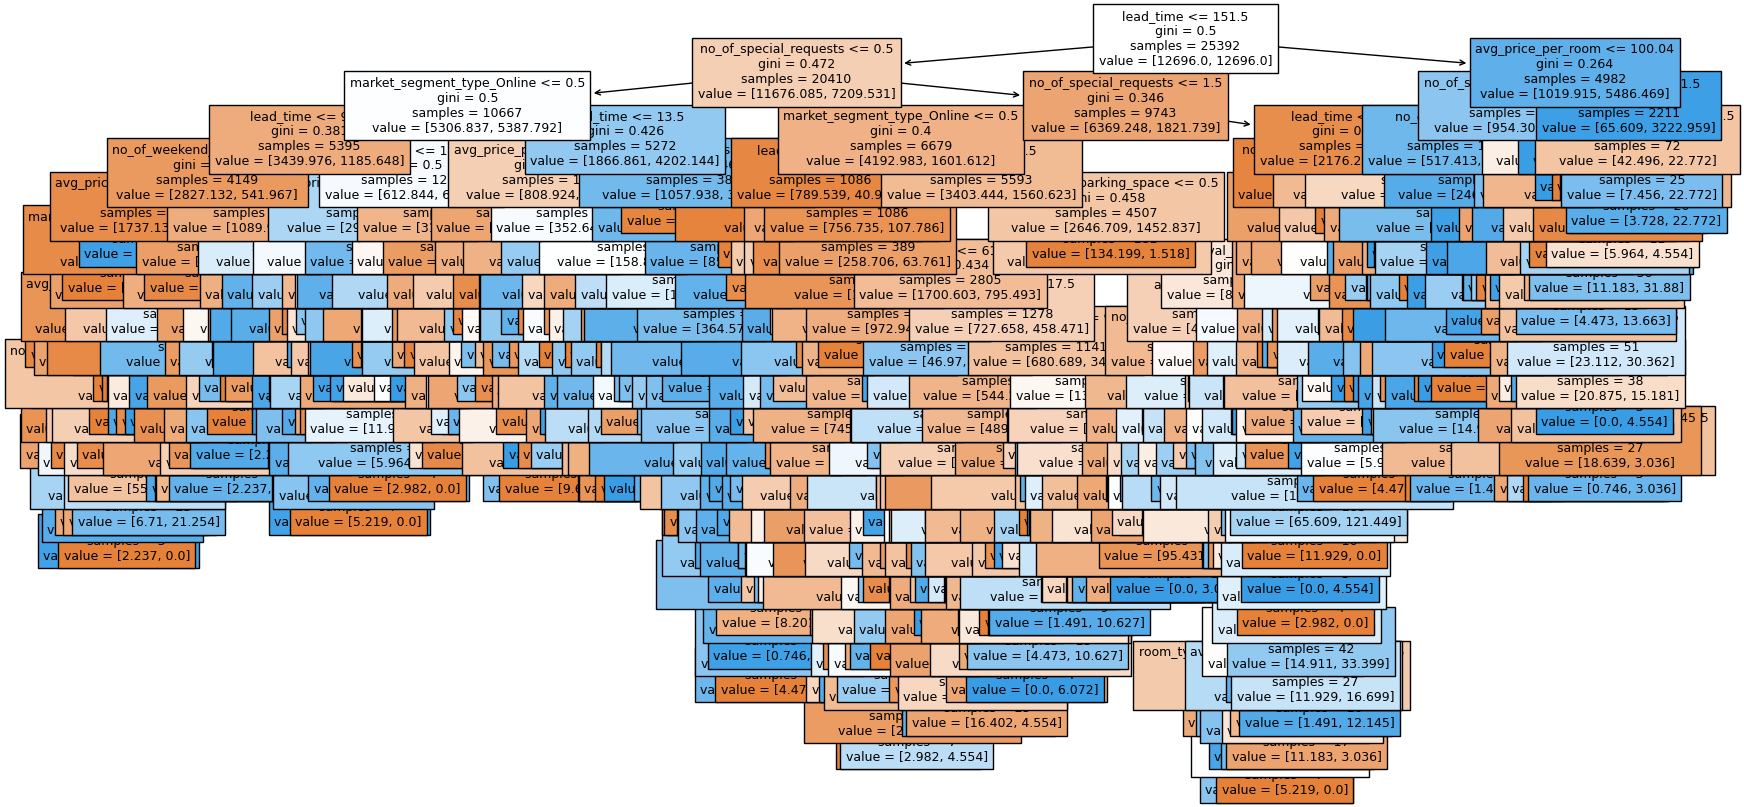

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

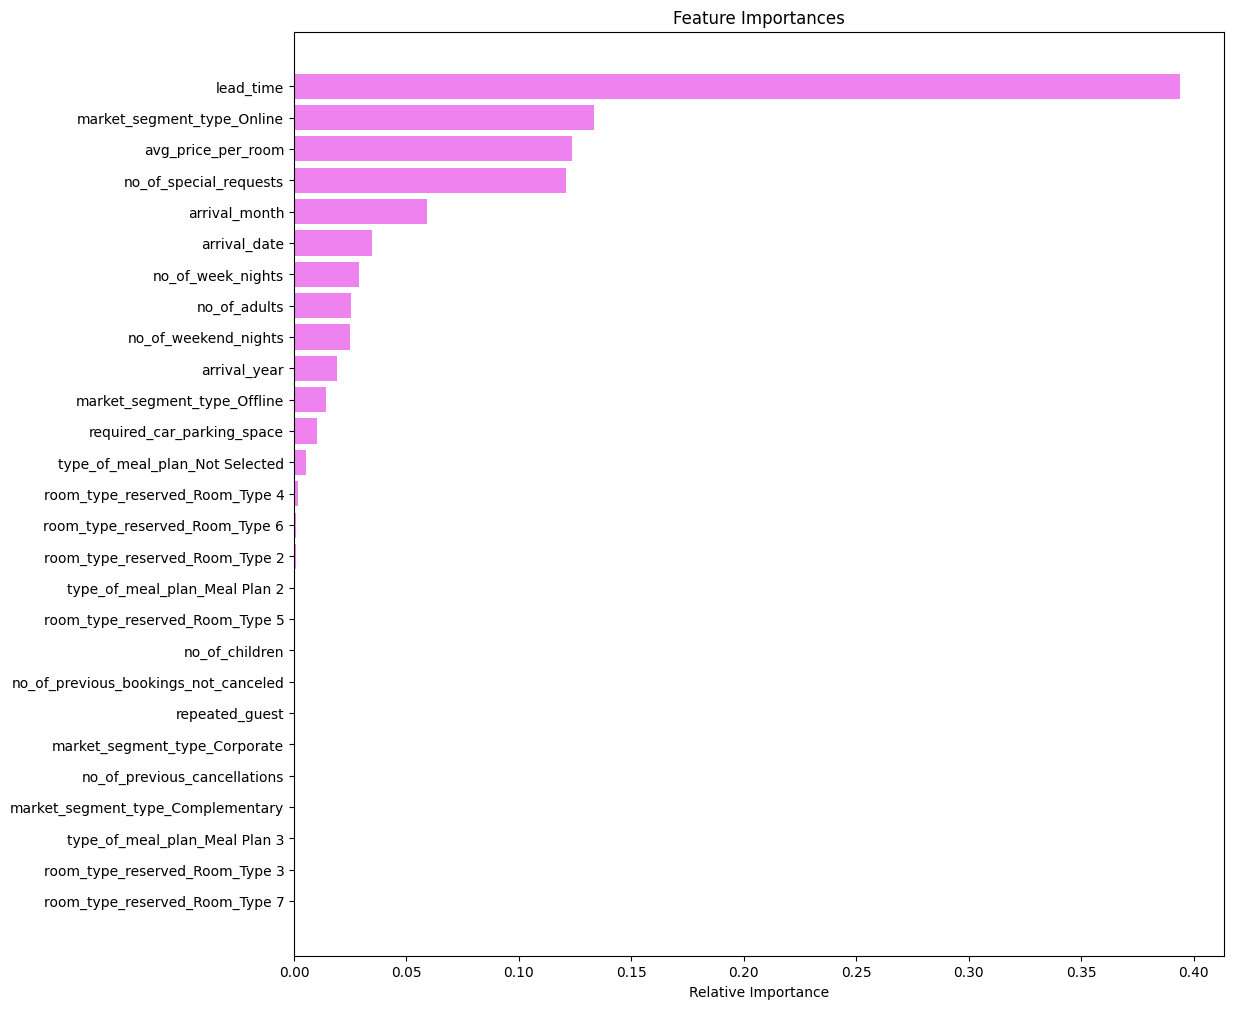

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:** In the pre tuned decision tree also, `lead_time` and `avg_price_per_room` are the most important features.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.61854,0.89954
Recall,0.98661,0.85651,0.90303
Precision,0.99578,0.45773,0.81274
F1,0.99117,0.59662,0.85551


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree with sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.61840,0.86879
Recall,0.81175,0.86229,0.85576
Precision,0.79461,0.45295,0.76614
F1,0.80309,0.59392,0.80848


**Observation:** Decision tree models with post-pruning gave us high recall, precision and F1 scores on both training and test sets. Hence we will choose the post pruned tree as the best model.

# Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

#### **Insights:**

We analyzed a dataset of nearly 36,275 customer bookings for INN Hotels group chain of hotels based in Portugal. The data contains the different attributes of customers' booking details like, booking ID, number of adults and children in the booking, number of weekday and weekend nights, meal plan selected, car parking needed, room type reserved, booking lead time, date of booking, booking segment type (Online, Offline, etc.), booking status, etc.. After developing a ML-based solution, the main features infuencing whether a customer would cancel a booking or not are based on lead time of booking, average price per room, whether the booking is made using Online market segment type and number of special requests made.

#### **Conclusions:**

1. We have been able to build a predictive model that can be used by the INN hotels group to find whether the customers will cancel a particular booking with an f1_score of 0.70 on the training and testing set with a threshold value of 0.42.

2. SImilarly, we also built a decision tree model that can be used to predict whether the customers will cancel a particular booking or not and can correctly identify 80% of the cancellations.

3. Lead time of booking, average price per room, whether the booking is made using Online market segment type and number of special requests made are the most important features in predicting whether the customer would cancel a booking or not.

4. From the decision tree, it has been observed that if lead time is greater than 151.5 days, average price per room is greater than $100, arrival month is less than 11.5 and number of special requests is less than 2.5 then the customer is most likely to cancel.

#### **Recommendations:**

1. **Flexible cancellation policies:** Allow guests to cancel or modify reservations without significant penalties within a reasonable time frame. Flexible policies can improve guest satisfaction and loyalty.

2. **Offer refunds or credits:** Provide the option for refunds or credits to encourage guests to reschedule their stays.

3. **Offer to reschedule bookings:** Propose rescheduling bookings instead of canceling them.

4. **Consider refund requests on a case-by-case basis:** Many hotel stays are refundable if canceled within at least 48 hours. Most places will offer a refund if you have a reasonable excuse.

5. **Partial charge in case of no show:** Charge customers 1 night stay in case of a no show so that the hotel can benift from the lost revenue and possible other charges it had to bear.


